This script trains a simple Multi-Layer Perceptron (MLP) on the CIFAR-10 dataset.

In [1]:
# import necessary torch libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import os
import numpy as np
import random

# import MLP model
from MLP_architecture import MLP

# seed values
seed = 42  # or any number you prefer
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

## Data preprocessing and loading

In [2]:
# transform the data to tensor and normalize it
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

num_workers = 4
# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=num_workers, prefetch_factor=8, persistent_workers=True)

testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=num_workers, prefetch_factor=8, persistent_workers=True)

## Load the model

In [3]:
# Model loading and other boilerplate code required to train the model
model = MLP()

# Loss function and optimizer (PyTorch object initialization)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training





In [22]:
# Helper functions to train model and visualise loss and accuracy
def reset_model(model):
    for layer in model.children():
        if hasattr(layer, 'reset_parameters'):
            layer.reset_parameters()

def training(model, loss_func, optimizer, trainloader, epochs=10):
    # By default training continues from where it was left
    reset_model(model)

    # Training loop with tracking of training error and accuracy
    train_losses = []
    train_accuracies = []

    for epoch in range(epochs):
        # running variables in an iteration of epoch
        running_loss = 0.0
        correct = 0
        total = 0

        # iterate over the mini-batches
        for i, (inputs, labels) in enumerate(trainloader):
            # zero the parameter gradients (by default, gradients are accumulated)
            optimizer.zero_grad()

            # forward pass
            outputs = model(inputs)
            # calculate loss
            loss = loss_func(outputs, labels)
            running_loss += loss.item()

            # backward pass
            loss.backward()

            # update weights and biases
            optimizer.step()

            # Calculate accuracy
            '''
                # To Calculate accuracy
                    - outputs: shape is (batch_size, num_classes), containing raw scores (logits) for each class.
                    - labels: shape is (batch_size), containing the correct label for each sample.
                    - predicted: shape is (batch_size), containing the predicted label for each sample.
                    - correct: number of correctly classified samples.
            '''
            _, predicted = torch.max(outputs, dim=1)    # along the columns (dim=1)
            correct += (predicted == labels).sum().item()   # item() to get the value of tensor
            total += labels.size(0) #  total batches size.

        # averaged over every epoch to smooth out the noise due to the mini batch (variance).
        avg_loss = running_loss / 780   # average loss per mini batch over an epoch.
        accuracy = 100 * correct / total
        # print(f"Epoch {epoch + 1}, @ Batch {(i + 1)}, Avg Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%")

        train_losses.append(avg_loss)
        train_accuracies.append(accuracy)

        running_loss = 0.0

    print("Finished Training")

    return train_losses, train_accuracies

def plot_training_loss_and_accuracy(loss_list, accuracy_list):
    import matplotlib.pyplot as plt

    # Plotting the loss and accuracy curves during training
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Plot on the first subplot
    axes[0].grid(True, alpha=0.35, linestyle='-.', color='black', linewidth=0.75)
    axes[0].plot(range(1,len(loss_list)+1), loss_list, color='red', linestyle='-', linewidth=1, marker='.')
    axes[0].set_title('Loss Curve', fontsize=16)
    axes[0].set_xlabel('Epochs', fontsize=12)
    axes[0].set_ylabel('Average Loss (per mini-batch) over an epoch ', fontsize=11)

    # Plot on the second subplot
    axes[1].grid(True, alpha=0.35, linestyle='-.', color='black', linewidth=0.75)
    axes[1].plot(range(1, len(accuracy_list)+1), accuracy_list,  color='blue', linestyle='-', linewidth=1, marker='.')
    axes[1].set_title('Accuracy Curve', fontsize=16)
    axes[1].set_xlabel('Epochs', fontsize=12)
    axes[1].set_ylabel('Accuracy (averaged over an epoch)', fontsize=11)

    plt.tight_layout()  # Adjust spacing
    plt.show()

    return None

Finished Training


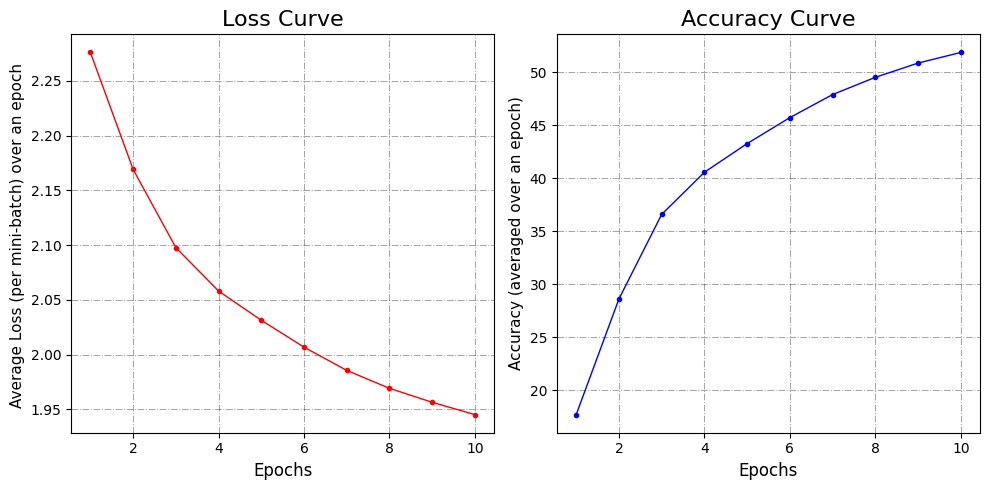

In [23]:
# train for 10 epochs
train_losses10, train_accuracies10 = training(model, loss_func, optimizer, trainloader, epochs=10)
plot_training_loss_and_accuracy(train_losses10, train_accuracies10)

### Comments:
- The training works. And the parameters are getting updated.

- This is evident from the fact that the training loss (averaged over every epoch) is getting reduced.
- And the training accuracy also increases in the subsequent epochs.
- In total there are 50000/64 = 780 mini batches in 1 epoch.

## Hyperparameter tuning

Finished Training


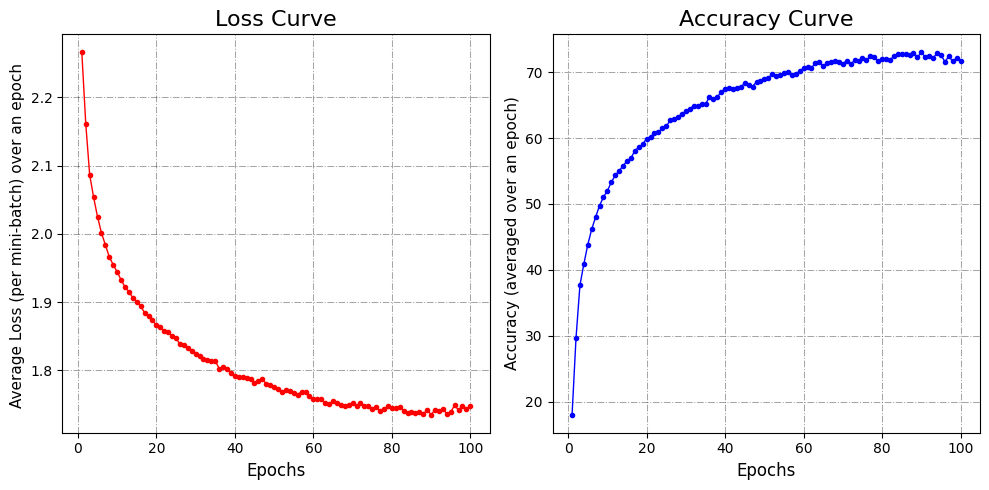

In [ ]:
train_losses100, train_accuracies100 = training(model, loss_func, optimizer, trainloader, epochs=100)
plot_training_loss_and_accuracy(train_losses100, train_accuracies100)

In [ ]:
train_losses200, train_accuracies200 = training(model, loss_func, optimizer, trainloader, epochs=200)
plot_training_loss_and_accuracy(train_losses200, train_accuracies200)